In [1]:
import sys
sys.path.append('../')
sys.path.append('../get_branch/linear')
sys.path.append('../model_json/make_json_program/linear')

import json
import numpy as np
import matplotlib.pyplot as plt

import make_regression_json
import linear_input_branch
import linear_hidden_branch
import linear_output_branch

In [2]:
!pwd

/Users/info/Desktop/lab/program/plot_branch_node/forward/plot


In [3]:
make_regression_json.make_json()

In [4]:
json_file = open('../model_json/json/regression.json', 'r')
json_value  = json.load(json_file)
json_value

{'layer0': {'input_features': 13,
  'out_features': 10,
  'layer_type': 'input',
  'processing_type': 'linear'},
 'layer1': {'input_features': 10,
  'out_features': 10,
  'layer_type': 'hidden',
  'processing_type': 'linear'},
 'layer2': {'input_features': 10,
  'out_features': 1,
  'layer_type': 'output',
  'processing_type': 'linear'}}

In [5]:
#dictからlistを作成（最初からlistを作成したほうが楽だったかも）
branch_list = np.empty(0)

for i in range(len(json_value)):
    layer_json_value = json_value["layer" + str(i)]
    
    if layer_json_value["layer_type"] == "input":
        if layer_json_value["processing_type"] == "linear":
            branch_list = np.append(branch_list,linear_input_branch.get_branch(layer_json_value))
        
    if layer_json_value["layer_type"] == "hidden":
        if layer_json_value["processing_type"] == "linear":
            branch_list = np.append(branch_list,linear_hidden_branch.get_branch(layer_json_value))

    if layer_json_value["layer_type"] == "output":
        if layer_json_value["processing_type"] == "linear":
            branch_list = np.append(branch_list,linear_output_branch.get_branch(layer_json_value))
branch_list

array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.])

(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 23.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

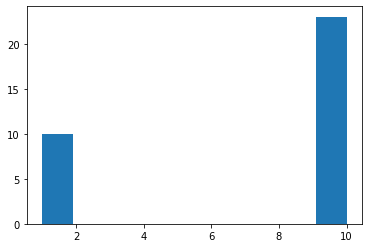

In [6]:
plt.hist(branch_list)